Author: Justin Short

# Predict Airplane Speed Based on Altitude
The goal of this project is to create a model that can predict the speed of an airplane based on its current altitude.

## Processing Data
This dataset [Aircraft Local FLight Data from Kaggle.com](https://www.kaggle.com/datasets/brianwarner/aircraft-data-from-nov-2022-through-dec-31-2022) contains flight data from roughly 30,000 flights spanning november 2022 through january 2023. All data points appear to be collected from a fixed logitude and latitude based off these values in the dataset.  

Regression models are sensitive to outliers so I trimmed some of the outer datapoints, which gave minor improvements to the evaluation metrics I chose to use (mean squared error and R^2). 

An odd pattern I noticed in the data, after plotting a scatterplot for the first time, was that there was a line of data points that were all 460 mph regardless of altitiude. I suspect this was either a data collection error or a way of replacing missing values. Dropping these data points improved the evaluation metrics of the model. Before dropping these data points, the correlation between altitude and speed was 0.58, and after dropping these data points the correlation was 0.77.

## Regression Models
I tested several different models in an attempt to find which one would result in the best performance in making predictions. The models tested were linear regression, quadratic regression, cubic regression, random forest, gradient boosting, and quadratic regression with L1 (Ridge) and L2 (Lasso) regularization. After testing linear, quadratic, and cubic regression models (as well as based on examining the scatterplot of data points) I chose to use the cubic polynomial regression model as my baseline moving forward. I checked if an ensemble model like random forest or gradient boost would improve the performance of the model. While they did perform slightly better on this dataset, I did not find the improvements significant enough to justify the cost of these models being more sensitive to overfitting. The addition of regularization techniques made no improvent to results.

## Results
The best performing models were quadratic, cubic, and gradient boost. The gradient boost model is sensitive to overfitting, so I will be choosing not to use it to implement the final predictor. Both the cubic and quadratic models are very close in performance, but the cubic curve appears to ever so slightly fit the scatterplot better, and the evaluation metrics support this observation, if only by a slight margin. 

For this reason I have decided to use the cubic polynomial regression model for the final implementation of the predictor. The final model will 

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [2]:
# Import data
raw = pd.read_csv('data/aircraft-data_nov_dec.csv')
features = ['alt', 'mph']

# Data cleaning
data = raw[features]
data = data.dropna()
data = data[data['mph'] > 0]
data = data[data['alt'] > 0]

# there was an odd amount of 460 mph values that were independent of altitude
# this may have been due to a data collection error
# removing these values significantly improved the model
data = data[data['mph'] != 460]

# Drop outliers (5% top and bottom)
data = data[data['mph'] < data['mph'].quantile(0.98)]
data = data[data['mph'] > data['mph'].quantile(0.02)]
data = data[data['alt'] < data['alt'].quantile(0.98)]
data = data[data['alt'] > data['alt'].quantile(0.02)]

# Save processed data
data.to_csv('data/processed_data.csv', index=False)

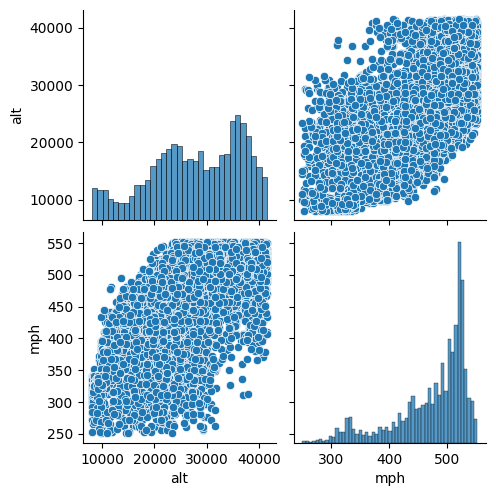

In [3]:
# Plot data
sns.pairplot(data)
plt.show()

Root mean squared error: 40.82111903662966
R2 score: 0.5751652721997973
Mean absolute percentage error: 0.06860324927221306


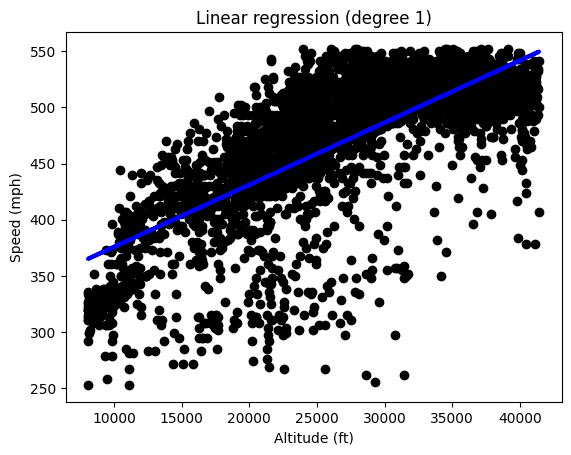

In [4]:
# Split data
X = data['alt'].values.reshape(-1, 1)
y = data['mph'].values.reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear regression
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test) 

# Metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
print(f'Root mean squared error: {rmse}')
print(f'R2 score: {r2}')
print(f'Mean absolute percentage error: {mape}')

# Plot results
plt.scatter(X_test, y_test, color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)
plt.xlabel('Altitude (ft)')
plt.ylabel('Speed (mph)')
plt.title('Linear regression (degree 1)')
plt.savefig('images/linear_regression_degree_1.png')
plt.show()

Root Mean squared error: 37.83768488546681
R2 score: 0.6349945821369458
Mean absolute percentage error: 0.058168436081165245


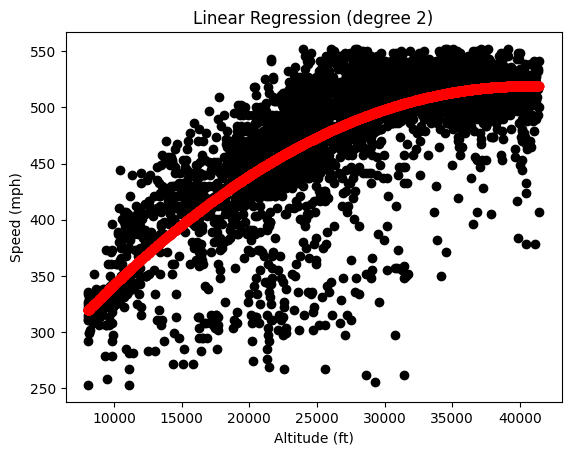

In [5]:
# Polynomial regression
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
model = LinearRegression()
model.fit(X_train_poly, y_train)
y_pred = model.predict(X_test_poly)

# Metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
print(f'Root Mean squared error: {rmse}')
print(f'R2 score: {r2}')
print(f'Mean absolute percentage error: {mape}')

# Plot results
plt.scatter(X_test, y_test, color='black')
plt.scatter(X_test, y_pred, color='red')
plt.xlabel('Altitude (ft)')
plt.ylabel('Speed (mph)')
plt.title('Linear Regression (degree 2)')
plt.savefig('images/linear_regression_degree_2.png')
plt.show()

Root Mean squared error: 37.83768488546554
R2 score: 0.6349945821369702
Mean absolute percentage error: 0.05816843608112165


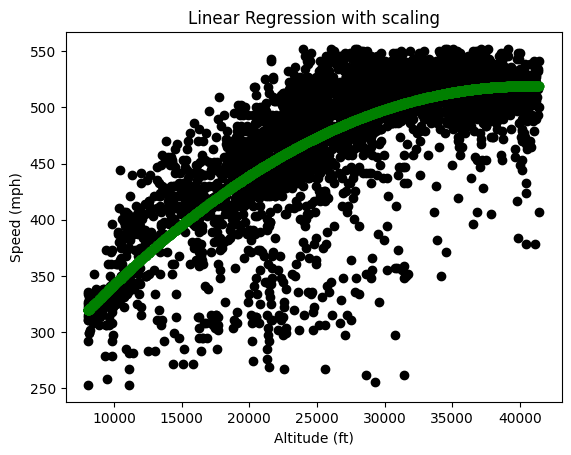

In [6]:
# Polynomial regression with scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)
model = LinearRegression()
model.fit(X_train_poly, y_train)
y_pred = model.predict(X_test_poly)

# Metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
print(f'Root Mean squared error: {rmse}')
print(f'R2 score: {r2}')
print(f'Mean absolute percentage error: {mape}')


# Plot results
plt.scatter(X_test, y_test, color='black')
plt.scatter(X_test, y_pred, color='green')
plt.xlabel('Altitude (ft)')
plt.ylabel('Speed (mph)')
plt.title('Linear Regression with scaling')
plt.savefig('images/linear_regression_degree_2_scaled.png')
plt.show()

Root Mean squared error: 37.68474840139297
R2 score: 0.6379392564961013
Mean absolute percentage error: 0.05803032497586711


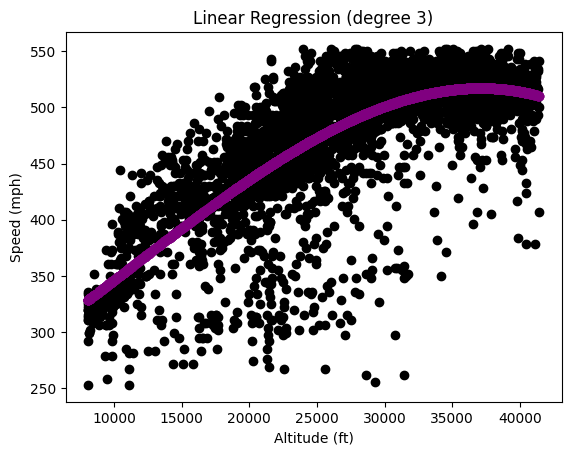

Predicted speed at 20175 ft: [[437.14157176]]


In [7]:
# Scaling made no difference in the model (since we have only 1 input feature) 
# but it is still good practice to scale the data
# Polynomial regression with degree 3 and scaling
poly = PolynomialFeatures(degree=3)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)
model = LinearRegression()
model.fit(X_train_poly, y_train)
y_pred = model.predict(X_test_poly)

# Metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
print(f'Root Mean squared error: {rmse}')
print(f'R2 score: {r2}')
print(f'Mean absolute percentage error: {mape}')

# Plot results
plt.scatter(X_test, y_test, color='black')
plt.scatter(X_test, y_pred, color='purple')
plt.xlabel('Altitude (ft)')
plt.ylabel('Speed (mph)')
plt.title('Linear Regression (degree 3)')
plt.savefig('images/linear_regression_degree_3_scaled.png')
plt.show()

# Predict single value of alt = 20175
alt = np.array([[20175]])
alt_scaled = scaler.transform(alt)
alt_poly = poly.transform(alt_scaled)
speed = model.predict(alt_poly)
print(f'Predicted speed at 20175 ft: {speed}')

Root Mean squared error: 37.83768440506006
R2 score: 0.6349945914055395
Mean absolute percentage error: 0.058168463042667755


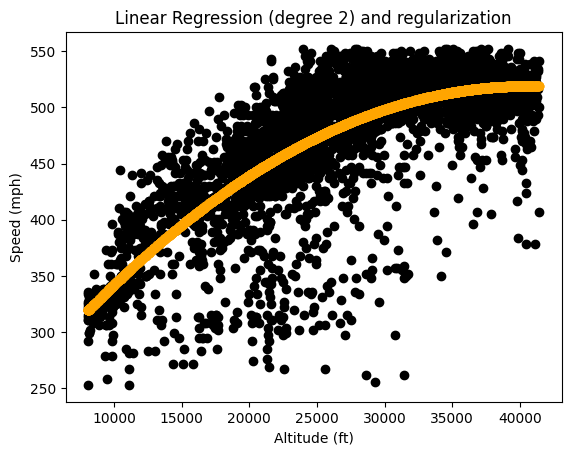

In [8]:
# Polynomial regression with degree 2 and R1 regularization
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)
model = Ridge(alpha=0.1)
model.fit(X_train_poly, y_train)
y_pred = model.predict(X_test_poly)

# Metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
print(f'Root Mean squared error: {rmse}')
print(f'R2 score: {r2}')
print(f'Mean absolute percentage error: {mape}')

# Plot results
plt.scatter(X_test, y_test, color='black')
plt.scatter(X_test, y_pred, color='orange')
plt.xlabel('Altitude (ft)')
plt.ylabel('Speed (mph)')
plt.title('Linear Regression (degree 2) and regularization')
plt.savefig('images/linear_regression_degree_2_scaled_L1_regularization.png')
plt.show()

Root Mean squared error: 37.83900129268376
R2 score: 0.6349691839591134
Mean absolute percentage error: 0.05818860647858241


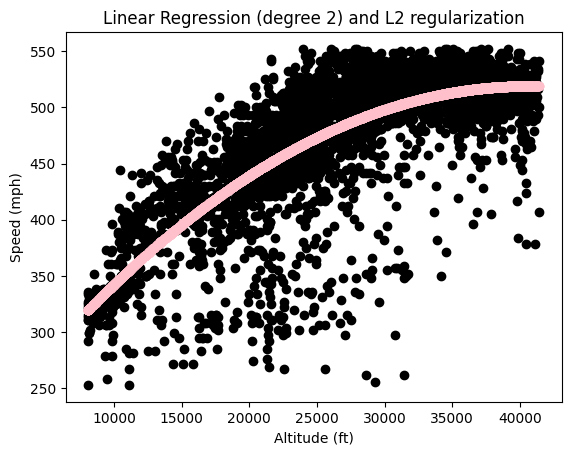

In [9]:
# Polynomial regression with degree 2 and L2 regularization
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)
model = Lasso(alpha=0.1)
model.fit(X_train_poly, y_train)
y_pred = model.predict(X_test_poly)

# Metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
print(f'Root Mean squared error: {rmse}')
print(f'R2 score: {r2}')
print(f'Mean absolute percentage error: {mape}')

# Plot results
plt.scatter(X_test, y_test, color='black')
plt.scatter(X_test, y_pred, color='pink')
plt.xlabel('Altitude (ft)')
plt.ylabel('Speed (mph)')
plt.title('Linear Regression (degree 2) and L2 regularization')
plt.savefig('images/linear_regression_degree_2_scaled_L2_regularization.png')
plt.show()

Root Mean squared error: 39.084703129705524
R2 score: 0.6105391261829728
Mean absolute percentage error: 0.06070110711759679


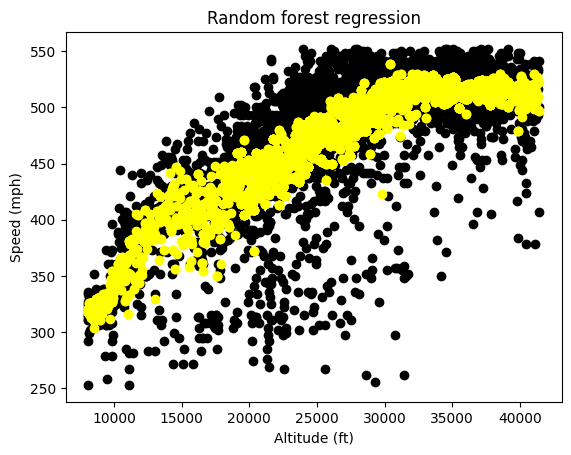

In [10]:
# Random forest regression
model = RandomForestRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
print(f'Root Mean squared error: {rmse}')
print(f'R2 score: {r2}')
print(f'Mean absolute percentage error: {mape}')

# Plot results
plt.scatter(X_test, y_test, color='black')
plt.scatter(X_test, y_pred, color='yellow')
plt.xlabel('Altitude (ft)')
plt.ylabel('Speed (mph)')
plt.title('Random forest regression')
plt.savefig('images/random_forest_regression.png')
plt.show()

Root Mean squared error: 37.34421104252565
R2 score: 0.6444531984695878
Mean absolute percentage error: 0.0569462963616922


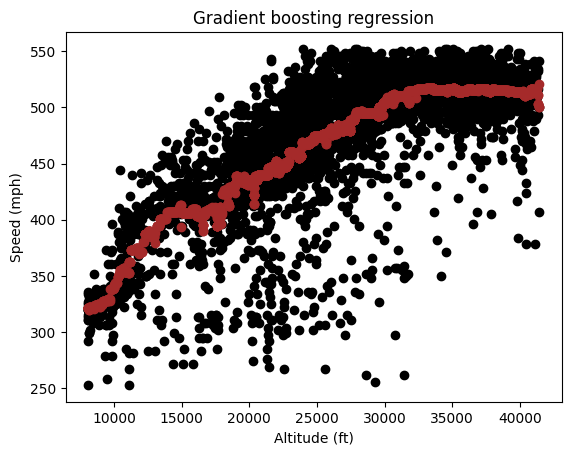

In [11]:
# Gradient boosting regression
model = GradientBoostingRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
print(f'Root Mean squared error: {rmse}')
print(f'R2 score: {r2}')
print(f'Mean absolute percentage error: {mape}')

# Plot results
plt.scatter(X_test, y_test, color='black')
plt.scatter(X_test, y_pred, color='brown')
plt.xlabel('Altitude (ft)')
plt.ylabel('Speed (mph)')
plt.title('Gradient boosting regression')
plt.savefig('images/gradient_boosting_regression.png')
plt.show()